

- Diskrétní reprezentace signálu
- Generování ideálních periodických signálů
- Generování signálů s chybami
- vzorkování signálu, aliasing

In [9]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import cmath
import time

#alokace pole
x = np.zeros(10);
print(x.size)
print(x.shape)
print(type(x))


10
(10,)
<class 'numpy.ndarray'>


Diskrétní reprezentace signálu
- nagenerovat signál pomocí 
    - vestavených funkcí
    - mnou definované funkce


In [13]:
n_length=int(1e8);

tsig = np.linspace(1,n_length,n_length);
xsig = np.zeros(n_length)

#konstanta
xsig[:] = 0.5 
#plt.plot(tsig,xsig)

#vestavěná funkce
xsig=np.sin(tsig)
#plt.plot(tsig,xsig)

#moje funkce
def mojeFunkce(x):
    out=x*x
    return np.array(out)

xsig = mojeFunkce(xsig)
#plt.plot(tsig,xsig)

#plt.show()



- používat vektorizované příkazy - operace na celá pole
    - měření času 

In [14]:
start = time.time()
xsig[:] = 0.5 
end = time.time()
print(end-start)


start = time.time()
for i in range(1,n_length):
    xsig[i]=0.5

end = time.time()
print(end-start)



0.05800747871398926
10.74340009689331


Generování periodických signálů
- sinusový signál
- pilový, trojúhelníkový signál
- obdélníkový signál
- impulsy

pomocí 
- vestavěných funckí numpy/scipy
- pomocí user-defined funkcí

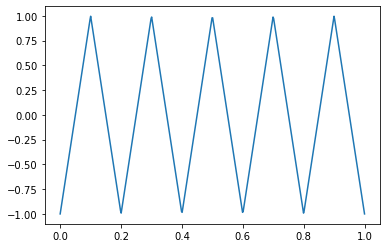

In [17]:
import scipy.signal as sig
xsig =np.zeros(n_length)

tsigs = np.linspace(0,1,500)
per=2*np.pi
num=5
xsigs = sig.sawtooth(tsigs*per*num,0.5)



plt.plot(tsigs,xsigs);

Pilový signál pomocí user-def funkce a funkce sinus


$$f(x) = \frac{\sin (2\pi f_0 t)}{1^2} - \frac{\sin (2\pi 3f_0 t)}{3^2} + \frac{\sin (2\pi 5f_0 t)}{5^2} - \frac{\sin (2\pi 7f_0 t)}{7^2} + ....$$

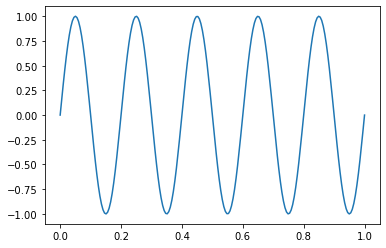

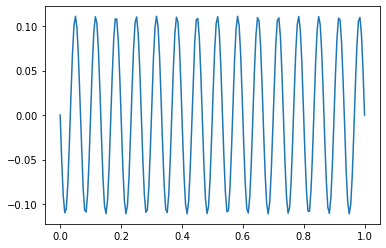

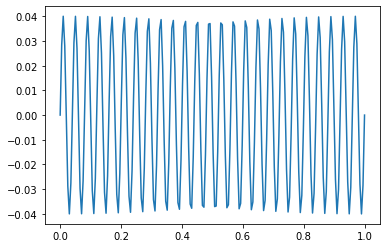

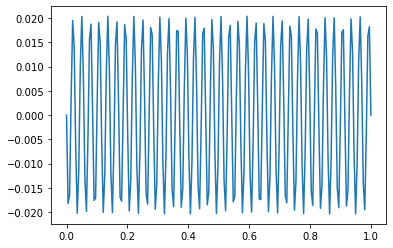

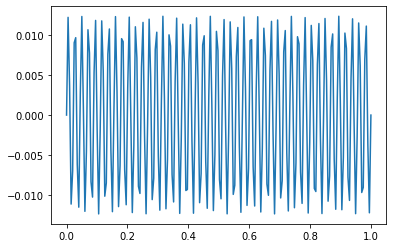

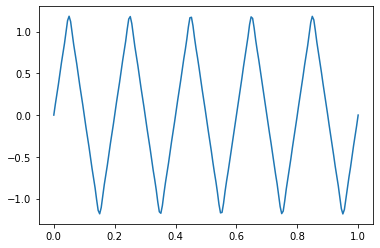

In [19]:

def SingleSin(k,f, tvec):    
    Val = (np.sin(2*np.pi*f*k*tvec))/(k*k);
    return np.array(Val)

#variables
f=5; # Hz
t_length=200;
Nelem = 10;

#accumulate individual vectors
tsig = np.linspace(0,1,t_length);
sinvec = np.zeros((Nelem,t_length));
ivec = np.array(range(1,Nelem,2));

SignalOut = np.zeros((t_length))

#fill the vectors
iter=1;
for i in ivec:
    fact = (-1)**(iter+1);
    Val = fact*SingleSin(i,f, tsig);
    sinvec[iter,:] = Val[:];
    SignalOut = SignalOut + Val;   
    plt.plot(tsig,sinvec[iter,:]);
    #plt.plot(tsig,SignalOut);
    plt.show();
    time.sleep(2)
    iter=iter+1;

plt.plot(tsig,SignalOut) ;

- Generování signálu s chybami

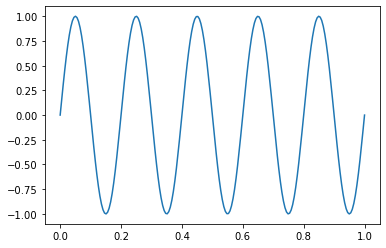

(200,)
(200,)


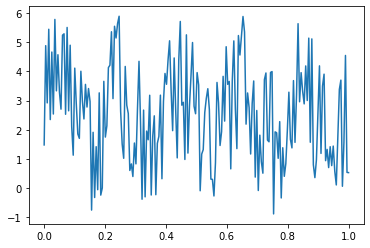

In [21]:
def SingleSin(k,f, tvec):    
    Val = (np.sin(2*np.pi*f*k*tvec))/(k*k);
    return np.array(Val)

#variables
f=5; # Hz
t_length=200;

#accumulate individual vectors
tsig = np.linspace(0,1,t_length);
SignalOut = SingleSin(1,f,tsig);
plt.plot(tsig,SignalOut);
plt.show();

# insert errors
Amp = 5.0
Err = Amp*np.random.rand(t_length)

print(Err.shape)
print(SignalOut.shape)
SignalOut = SignalOut + Err
plt.plot(tsig,SignalOut);
plt.show();



- vzorkování signálu, aliasing
    - nagenerujte signál s definovanou periodou $f_0$
    - převzorkujte signál pomocí vestavěné funkce z knihovny scipy
    - demonstrujte vliv vzorkování na podobu signálu